<a href="https://colab.research.google.com/github/TomPhanAnh/Kaggle-Solution/blob/main/The_Movies_Dataset_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

# Set options for display columns & rows
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width",1000)

# Working with string dataset
# Parse the stringified features into their corresponding python objects
import ast
from ast import literal_eval

# Working with Machine Learning - Unsupervised dataset
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
#-----------------------------------------------------
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 

# **The Movies Dataset**

Metadata on over 45,000 movies. 26 million ratings from over 270,000 users.

## **About Dataset**
### **Context**
These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

### **Content**
This dataset consists of the following files:

movies_metadata.csv: The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

keywords.csv: Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

credits.csv: Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

links.csv: The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

links_small.csv: Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.

ratings_small.csv: The subset of 100,000 ratings from 700 users on 9,000 movies.

The Full MovieLens Dataset consisting of 26 million ratings and 750,000 tag applications from 270,000 users on all the 45,000 movies in this dataset can be accessed here

### **Acknowledgements**
This dataset is an ensemble of data collected from TMDB and GroupLens.
The Movie Details, Credits and Keywords have been collected from the TMDB Open API. This product uses the TMDb API but is not endorsed or certified by TMDb. Their API also provides access to data on many additional movies, actors and actresses, crew members, and TV shows. You can try it for yourself here.

The Movie Links and Ratings have been obtained from the Official GroupLens website. The files are a part of the dataset available here

### **Inspiration**
This dataset was assembled as part of my second Capstone Project for Springboard's Data Science Career Track. I wanted to perform an extensive EDA on Movie Data to narrate the history and the story of Cinema and use this metadata in combination with MovieLens ratings to build various types of Recommender Systems.

Both my notebooks are available as kernels with this dataset: The Story of Film and Movie Recommender Systems

Some of the things you can do with this dataset:
Predicting movie revenue and/or movie success based on a certain metric. What movies tend to get higher vote counts and vote averages on TMDB? Building Content Based and Collaborative Filtering Based Recommendation Engines.

In [ ]:
# import credit file
credit = pd.read_csv("credits.csv", engine = "python", error_bad_lines = False)

# import keywords file
keyword = pd.read_csv("keywords.csv", engine = "python", error_bad_lines = False)

# import links 
links = pd.read_csv("links.csv", engine = "python", error_bad_lines = False)
# Movies_dataset
movies = pd.read_csv("movies_metadata.csv", engine = "python", error_bad_lines= False)

# ratings
ratings = pd.read_csv("ratings.csv", engine = "python", error_bad_lines= False)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
credit.head()
# id column: 

In [ ]:
print("Before Data manipulation/Cleaning process")
print(20*"*-")
for x,y in zip(["credit","keyword", "links","links_small","movies","ratings", "ratings_small"],
               [credit,keyword, links,movies,ratings]):
  print("{}'s shape: {}".format(x,y.shape))
  print("")

### **Data Manipulation with Credit**
Data Understanding:

Credit csv is dataset that describe several features of a firms included:

- **'cast_id'**: The id number of actor/actress active in firms
- **'character'**: The roleplay the actor/actress take charge
- **'credit_id'**:
- **'gender'**: sex of characters
- **'id'**: id number
- **'name'**: Name
- **'order'**:
- **'profile_path'**: Link lead to profile actor/actress


In [ ]:
credit.info()
print("Credit shape: {}".format(credit.shape))

### **Credit Dataset**

In [ ]:
credit.drop_duplicates(inplace = True)
credit.head()

In [ ]:
# Create lists to contain data for each sector
id_credit = []
cast_id   = []
character = []
credit_id = []
gender    = []
id        = []
name      = []
order     = []
profile_path = []

In [ ]:
# Updating the list of each columns extracting from column: credit["cast"]
for i in credit.index:
  data = literal_eval(credit["cast"][i])
  for x in range(len(data)):
    id_credit.append(credit["id"][i])
    try:
      # Cast id
      cast_id.append(data[x]['cast_id'])
            # character
      character.append(data[x]['character'])
            # Credit_id
      credit_id.append(data[x]['credit_id'])
            # Gender
      gender.append(data[x]['gender'])
            #id
      id.append(data[x]['id'])
            #Name
      name.append(data[x]['name'])
            #Profile
      profile_path.append(data[x]['profile_path'])
    except:
      pass

In [ ]:
# in order to avoid ValueError: All arrays must be of the same length
# List: order will have to update with null values/
order = [i for i in np.zeros(len(cast_id))]

#Create the dataset for Cast
credit_cast = pd.DataFrame({
                            "id_credit":id_credit,
                            "cast_id":cast_id,
                            "character":character,
                            "credit_id":credit_id,
                            "gender":gender,
                            "id":id,
                            "name":name,
                            "order":order,
                            "profile_path":profile_path})

In [ ]:
# id is f or caster -
credit_cast.head()

In [ ]:
for i in credit_cast.columns:
  print("Value Count of credit  [{}]".format(i))
  print(credit_cast[i].value_counts()[:5])
  print(100*"-")
  print("")

In [ ]:
# Do the same as cast for crew info
# Create list
id_crew = []
credit_c  = []
department = []
gender_c  = []
id_c      = []
job_c     = []
name_c    = []
profile_c = []

# -----------------------------------------------
# Fill the dataset 
for i in credit.index:
  data = literal_eval(credit["crew"][i])
  for x in range(len(data)):
    id_crew.append(credit["id"][i])
    credit_c.append(data[x]["credit_id"])
    department.append(data[x]["department"])
    gender_c.append(data[x]["gender"])
    id_c.append(data[x]["id"])
    job_c.append(data[x]["job"])
    name_c.append(data[x]["name"])
    profile_c.append(data[x]["profile_path"])

In [ ]:
crew_data = pd.DataFrame({"id_credit": id_crew, 
                          "credit_id":credit_c,
                          "department":department,
                          "gender":gender_c,
                          "id_crew":id_c,
                          "job":job_c,
                          "name":name_c,
                          "profile":profile_c})
crew_data.head()

<h1 id="hierarchical_agglomerative">Hierarchical Clustering - Agglomerative</h1>

We will be looking at a clustering technique, which is <b>Agglomerative Hierarchical Clustering</b>. Remember that agglomerative is the bottom up approach. <br> <br>
In this lab, we will be looking at Agglomerative clustering, which is more popular than Divisive clustering. <br> <br>
We will also be using Complete Linkage as the Linkage Criteria. <br>
<b> <i> NOTE: You can also try using Average Linkage wherever Complete Linkage would be used to see the difference! </i> </b>


In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering

<hr>
<h3 id="agglomerative_clustering">Agglomerative Clustering</h3>

We will start by clustering the random data points we just created.


The <b> Agglomerative Clustering </b> class will require two inputs:

<ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 </li> </ul>
    <li> <b>linkage</b>: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. </li>
    <ul> 
        <li> Value will be: 'complete' </li> 
        <li> <b>Note</b>: It is recommended you try everything with 'average' as well </li>
    </ul>
</ul> <br>
Save the result to a variable called <b> agglom </b>


### **Keywords dataset** 

Connected with movies through ***id***

In [ ]:
keys = []
id_keyword = []
for i in keyword.index:
  key = ""
  data = literal_eval(keyword["keywords"][i])
  for j in range(len(data)):
    key += str(data[j]["name"]) +"|"
  try:
    keys.append(key[:-1])
    id_keyword.append(keyword["id"][i])
  except:
    keys.append(np.nan)
    id_keyword.append(np.nan)

In [ ]:
keyword_new = pd.DataFrame({"id_credit":id_keyword, "keywords": keys})

In [ ]:
keyword_new.head()

### **Movies Dataset**

Hãy xóa year khỏi cột **title** bằng cách sử dụng hàm thay thế của pandas và lưu trữ trong cột **year** mới.

In [ ]:
# Create to fill the data from column: belongs_to_collection
id_x = []
name = []
poster_path = []
backdrop_path = []

# Fill blank list with data from belong_to_collection
for i in movies.index:
  try:
    data = literal_eval(movies['belongs_to_collection'][i])
    id_x.append(data["id"])
    name.append(data["name"])
    poster_path.append(data["poster_path"])
    backdrop_path.append(data["backdrop_path"])
  except:
    pass

# Function to return the genre of each firm
def return_genre(movies):
  genres = literal_eval(movies)
  genre = ""
  for i in range(len(genres)):
    genre += str(genres[i]["name"])
    genre += "|"
  return genre[:-1]
# Return genres of each movie
movies["genres"] = movies["genres"].apply(lambda x: return_genre(x))

In [ ]:
# the function for movies information
def information(movies,info):
  try:
    return literal_eval(movies)[0][info]
  except:
    return np.nan
# Return production-countries
# There is some issue with column: production_coutries
# return list then [0] and return country production
movies["id_company"]           = movies["production_companies"].apply(lambda x: information(x,"id"))
movies["production_companies"] = movies["production_companies"].apply(lambda x: information(x,"name"))
movies["production_coutries"]  = movies["production_countries"].apply(lambda x: information(x,"name"))
movies["spoken_languages"]     = movies["spoken_languages"].apply(lambda x: information(x,"name"))
## Return the companies of production

In [ ]:
##---------------------------------------------------------------
id_belongs   = []
name_belongs = []
poster_belongs = []
backdrop_belongs = []
for i in movies.index:
  try: 
    id_belongs.append(literal_eval(movies["belongs_to_collection"][i])["id"])
  except:
    id_belongs.append(np.nan)
  try: 
    name_belongs.append(literal_eval(movies["belongs_to_collection"][i])["name"])
  except:
    name_belongs.append(np.nan)
  try:
    poster_belongs.append(literal_eval(movies["belongs_to_collection"][i])["poster_path"])
  except:
    poster_belongs.append(np.nan)
  try:
    backdrop_belongs.append(literal_eval(movies["belongs_to_collection"][i])["backdrop_path"])
  except:
    backdrop_belongs.append(np.nan)
#----------------------------------------------------------------
movies["id_belongs"]            = id_belongs
movies["name_belongs"]          = name_belongs
movies["poster_path_belongs"]   = poster_belongs
movies["backdrop_path_belongs"] = backdrop_belongs

### **Ratings Dataset**

In [ ]:
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"])

In [ ]:
print("After Data manipulation/Cleaning process")
print(20*"*-")
for x,y in zip(["credit","keyword", "links","movies","ratings"],
               [credit,keyword, links,movies,ratings]):
  print("{}'s shape: {}".format(x,y.shape))
  print("")

### **Data Understanding** to New file

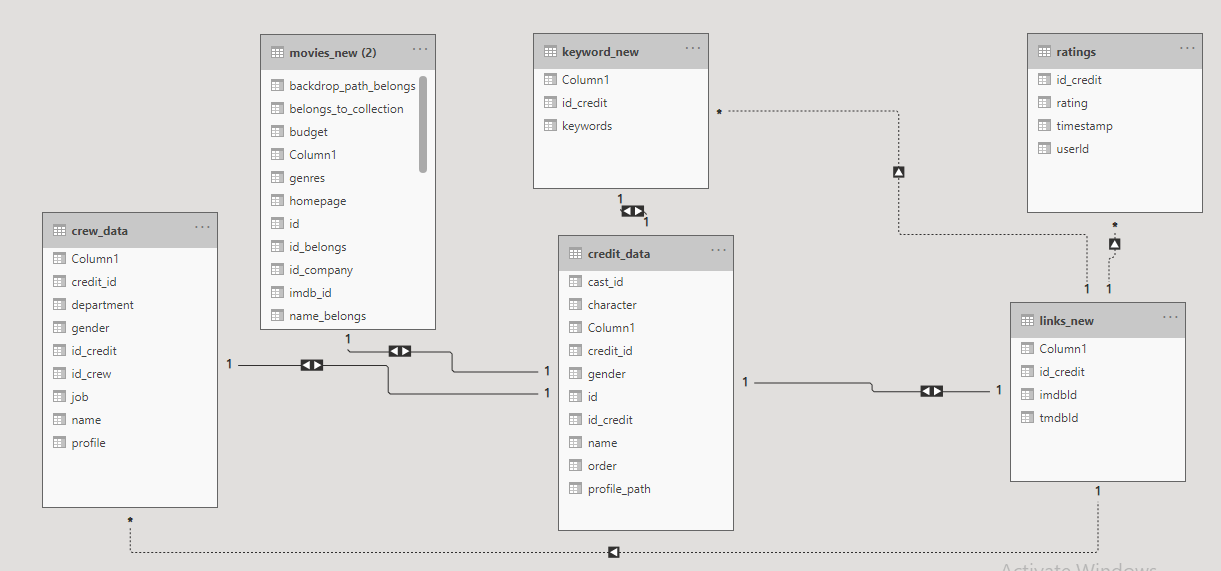


In [ ]:
keyword_new.head()

In [ ]:
keyword_new.head()
# id_credit

In [ ]:
ratings.rename(columns = {"movieId":"id_credit"},inplace = True)
# Rating & Links = movieId
ratings.head()

In [ ]:
links.rename(columns = {"movieId":"id_credit"}, inplace = True)
links.head()

In [ ]:
credit_cast.head()
# id_credit

In [ ]:
credit_new = pd.DataFrame(columns = ["id_credit","name"])
credit_new["id_credit"] = credit_cast["id_credit"].unique()
for i in credit_cast["id_credit"].unique():
  name = ""
  for j in credit_cast[credit_cast["id_credit"] == i]["name"].values:
    name += str(j) +"|"
  credit_new.loc[credit_new["id_credit"] == i, "name"] = name[:-1]
  



In [ ]:
ratings = ratings.groupby("id_credit").agg({"rating":"mean"}).reset_index()

In [ ]:
dataset = credit_new.merge(crew_data[crew_data["job"] == "Director"], 
                 on = "id_credit", 
                 how = "left").merge(
                 links, 
                 on = "id_credit", 
                 how = "left").merge(
                     keyword_new, 
                     on = "id_credit",
                     how = "left").merge(
                         ratings,
                         on = "id_credit",
                         how = "left" 
                  )[["id_credit","name_x","name_y","id_crew","imdbId","tmdbId","keywords","rating"]]

In [ ]:
def id_testing(x):
  try:
    return int(x)
  except:
    return np.nan

In [ ]:
movies["id"] = movies["id"].apply(lambda x: id_testing(x))
movies.dropna(subset = {"id"}, inplace = True)

In [ ]:
dataset = credit_new.merge(crew_data[crew_data["job"] == "Director"], 
                 on = "id_credit", 
                 how = "left").merge(
                 links, 
                 on = "id_credit", 
                 how = "left").merge(
                 keyword_new, 
                 on = "id_credit",
                 how = "left").merge(
                 ratings,
                 on = "id_credit",
                 how = "left").merge(movies, left_on = "id_credit", right_on = "id", how = "left")[["id_credit","name_x","name_y","imdbId","tmdbId",
                                                                                                    "keywords","rating","genres","overview","popularity",
                                                                                                    'production_companies',"production_coutries","vote_average","vote_count"]]
dataset.head()

# Content Based Filtering

Estimated time needed: **25** minutes

## Objectives

After completing this lab you will be able to:

-   Create a recommendation system using collaborative filtering


To acquire and extract the data, simply run the following Bash scripts:  
Dataset acquired from [GroupLens](http://grouplens.org/datasets/movielens?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ). Lets download the dataset. To download the data, we will use **`!wget`** to download it from IBM Object Storage.  
**Did you know?** When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


### **Recommendation base on Actor - Actress**

In [ ]:
actor_recommend = dataset[["id_credit","name_x","name_y"]]
#Every genre is separated by a | so we simply have to call the split function on |
actor_recommend["act"] = actor_recommend["name_x"].str.split("|")

Since keeping genres in a list format isn't optimal for the content-based recommendation system technique, we will use the One Hot Encoding technique to convert the list of genres to a vector where each column corresponds to one possible value of the feature. This encoding is needed for feeding categorical data. In this case, we store every different genre in columns that contain either 1 or 0. 1 shows that a movie has that genre and 0 shows that it doesn't. Let's also store this dataframe in another variable since genres won't be important for our first recommendation system.


In [ ]:
#Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
act = actor_recommend.copy()

#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in act.iterrows():
  for actor in row["act"]:
    act.at[index,actor] = 1
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
act = act.fillna(0)
act.head()

<a id="ref3"></a>

# Content-Based recommendation system


Now, let's take a look at how to implement **Content-Based** or **Item-Item recommendation systems**. This technique attempts to figure out what a user's favourite aspects of an item is, and then recommends items that present those aspects. In our case, we're going to try to figure out the input's favorite genres from the movies and ratings given.

Let's begin by creating an input user to recommend movies to:

Notice: To add more movies, simply increase the amount of elements in the **userInput**. Feel free to add more in! Just be sure to write it in with capital letters and if a movie starts with a "The", like "The Matrix" then write it in like this: 'Matrix, The' .


#### Add movieId to input user

With the input complete, let's extract the input movie's ID's from the movies dataframe and add them into it.

We can achieve this by first filtering out the rows that contain the input movie's title and then merging this subset with the input dataframe. We also drop unnecessary columns for the input to save memory space.


In [ ]:
inputId = movies_df[movies_df["title"].isin(inputMovies["title"].tolist())]
# Then merging it so we can get the movieId. It's implicity merging it by title
inputMovies = pd.merge(inputId, inputMovies)
# Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop("genres",1).drop("year",1)
inputMovies

We're going to start by learning the input's preferences, so let's get the subset of movies that the input has watched from the Dataframe containing genres defined with binary values.

In [ ]:
# Filtering out the movies from the input
rMovies = moviesWithGenres_df[moviesWithGenres_df["movieId"].isin(inputMovies["movieId"].tolist())]

We'll only need the actual genre table, so let's clean this up a bit by resetting the index and dropping the movieId, title, genres and year columns.

In [ ]:
# Resetting the index to avoid future issues
userMovies = userMovies.reset_index(drop = True)
# Dropping unnecessary due ti save memory and to avoid issues 
userGenreTable = userMovies.drop("movieId",1).drop("title",1).drop("genres",1)
userGenreTable

Now we're ready to start learning the input's preferences!

To do this, we're going to turn each genre into weights. We can do this by using the input's reviews and multiplying them into the input's genre table and then summing up the resulting table by column. This operation is actually a dot product between a matrix and a vector, so we can simply accomplish by calling Pandas's "dot" function.


In [ ]:
inputMovies["rating"]

In [ ]:
# Dot product to get weights
userProfile = userGenreTable.transpose().dot(inputMovies["rating"])
# The user profile
userProfile

Now, we have the weights for every of the user's preferences. This is known as the User Profile. Using this, we can recommend movies that satisfy the user's preferences.


Let's start by extracting the genre table from the original dataframe:


In [ ]:
# Now let's the genres of every movie in our original dataframe
genreTable = moviesWithGenres_df.set_index(moviesWithGenres_df["movieId"])
# And drop the unncesscary information
genreTable = genreTable.drop("movieId",1).drop("title",1).drop("year",1)
genreTable.head()

With the input's profile and the complete list of movies and their genres in hand, we're going to take the weighted average of every movie based on the input profile and recommend the top twenty movies that most satisfy it.


In [ ]:
# Multiply the genres by the weights and then take the weighted average
recommendation_df = ((genreTable*userProfile).sum(axis = 1))/userProfile.sum()
recommendation_df.head()

In [ ]:
#Sort our recommendations in descending order
recommendationTable_df = recommendationTable_df.sort_values(ascending = False)
# Just a peek at the values
recommendationTable_df.head()

#### **Now here's the recommendation table!**


In [ ]:
movies_df.loc[movies_df["movieId"].isin(recommendationTable_df.head().keys()]

### Advantages and Disadvantages of Content-Based Filtering

##### Advantages

-   Learns user's preferences
-   Highly personalized for the user

##### Disadvantages

-   Doesn't take into account what others think of the item, so low quality item recommendations might happen
-   Extracting data is not always intuitive
-   Determining what characteristics of the item the user dislikes or likes is not always obvious


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%205/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Collaborative Filtering

Estimated time needed: **25** minutes

## Objectives

After completing this lab you will be able to:

-   Create recommendation system based on collaborative filtering


Recommendation systems are a collection of algorithms used to recommend items to users based on information taken from the user. These systems have become ubiquitous can be commonly seen in online stores, movies databases and job finders. In this notebook, we will explore recommendation systems based on Collaborative Filtering and implement simple version of one using Python and the Pandas library.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">Acquiring the Data</a></li>
        <li><a href="#ref2">Preprocessing</a></li>
        <li><a href="#ref3">Collaborative Filtering</a></li>
    </ol>
</div>
<br>
<hr>


<a id="ref1"></a>

# Acquiring the Data
To acquire and extract the data, simply run the following Bash scripts:  
Dataset acquired from [GroupLens](http://grouplens.org/datasets/movielens?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ). Lets download the dataset. To download the data, we will use **`!wget`** to download it from IBM Object Storage.  
**Did you know?** When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


<hr>

<a id="ref2"></a>

# Preprocessing


In [ ]:
# DataFrame manipulation library
import pandas as pd
# Math function, we'll only need the sqrt function so let's import only that 
from math import sqrt
import numpy as no
import matplotlib.pyplot as plt
%matplotlib inline

Now, time to start our work on recommendation systems. 

The first technique we're going to take a look at is called **Collaborative Filtering**, which is also known as **User-User Filtering**. As hinted by its alternate name, this technique uses other users to recommend items to the input user. It attempts to find users that have similar preferences and opinions as the input and then recommends items that they have liked to the input. There are several methods of finding similar users (Even some making use of Machine Learning), and the one we will be using here is going to be based on the **Pearson Correlation Function**.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%205/images/User_Item.png" width=800px>

The process for creating a User Based recommendation system is as follows:

-   Select a user with the movies the user has watched
-   Based on his rating to movies, find the top X neighbours 
-   Get the watched movie record of the user for each neighbour.
-   Calculate a similarity score using some formula
-   Recommend the items with the highest score

Let's begin by creating an input user to recommend movies to:

Notice: To add more movies, simply increase the amount of elements in the userInput. Feel free to add more in! Just be sure to write it in with capital letters and if a movie starts with a "The", like "The Matrix" then write it in like this: 'Matrix, The' .


In [1]:
# Filtering out the movies by title
inputId = movies_df[movies_df["title"].isin(inputMovies["title"].tolist())]
# Then merging it so we can get the movieId. It's implicitly merging it by title
inputMovies = pd.merge(inputid, inputMovies)
# Droppings information we wont use from the input dataframe
inputMovies = inputMovies.drop("year",1)
# Final input Dataframe
# If a movie you added in isn't here, then it might not be in the original
# dataframe or it might spelled differently, please check capilisation.
inputMovies

#### The users who has seen the same movies

Now with the movie ID's in our input, we can now get the subset of users that have watched and reviewed the movies in our input.


In [ ]:
# Filtering out users that have watched movies that the input has watched and storing it
userSubset = ratings_df[ratings_df["movieId"].isin(inputMovies["movieId"].tolist())]
userSubset.head()

In [ ]:
# Groupby creates several sub dataframes where they all have the same value in column specific
userSubsetGroup = userSubset.groupby(["userId"])

# Lets look at one of the users. e.g  the one with userId = 1130
userSubsetGroup.get_group(1330)

# Let's also sort these groups so the users that share the most movies in common 
# with the input have higher priority. This provides a richer recommendations sinces
# we won't go through every single user

# Sorting it so users with movies most in common with the input will have priority
userSubsetGroup = sorted(userSubsetGroup, key = lambda x: len(x[1]), reverse = True)

# Now lets look at the first user
userSubsetGroup[0:3]

#### Similarity of users to input user

Next, we are going to compare all users (not really all !!!) to our specified user and find the one that is most similar.  
we're going to find out how similar each user is to the input through the **Pearson Correlation Coefficient**. It is used to measure the strength of a linear association between two variables. The formula for finding this coefficient between sets X and Y with N values can be seen in the image below. 

Why Pearson Correlation?

Pearson correlation is invariant to scaling, i.e. multiplying all elements by a nonzero constant or adding any constant to all elements. For example, if you have two vectors X and Y,then, pearson(X, Y) == pearson(X, 2 * Y + 3). This is a pretty important property in recommendation systems because for example two users might rate two series of items totally different in terms of absolute rates, but they would be similar users (i.e. with similar ideas) with similar rates in various scales .

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/bd1ccc2979b0fd1c1aec96e386f686ae874f9ec0 "Pearson Correlation")

The values given by the formula vary from r = -1 to r = 1, where 1 forms a direct correlation between the two entities (it means a perfect positive correlation) and -1 forms a perfect negative correlation. 

In our case, a 1 means that the two users have similar tastes while a -1 means the opposite.


We will select a subset of users to iterate through. This limit is imposed because we don't want to waste too much time going through every single user.


In [ ]:
userSubsetGroup = userSubsetGroup[0:100]


Now, we calculate the Pearson Correlation between input user and subset group, and store it in a dictionary, where the key is the user Id and the value is the coefficient


In [ ]:
# Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is t
pearsonCorrelationDict = {}

# For every user group in our subset
for name, group in userSubsetGroup:
  # Let's start by sorting the input and current user group so the values aren't mixed up late
  group = group.sort_values(by = "movieid")
  inputMovies = inputMovies.sort_values(by = "movieId")
  # Get the N for the formula
  nRatings = len(group)

  # Get the review scores for the movies that they both have in common
  temp_df = inputMovies[inputMovies["movieId"].isin(group["movieId"].tolist())]
  # And then store them in a temporary buffer variable in a list format to 
  # facilitate future calculation   
  tempRatingList = temp_df["rating"].tolist()
  # Let's also put the current user group reviews in a list format
  tempGroupList = group["rating"].tolist()
  # Now let's calculate the pearson correlation between two users, so called, x and y
  Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
  Syy = sum([i**2 for i in tempGroupList])  - pow(sum(tempGroupList,2))/float(nRatings)
  Sxy = sum(i*j for i,j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatins) 

  # if the denominator is different than zero, then divide, else, 0 correlation
  if Sxx != 0 and Syy != 0:
    pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
  else:
    pearsonCorrelationDict[name] = 0

In [ ]:
pearsonCorrelationDict.items()

In [ ]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

#### **The top x similar users to input user**

Now let's get the top 50 users that are most similar to the input.


In [ ]:
topUser = pearsonDF.sort_values(by = "similarityIndex", ascending = False)[0:50]
topUser.head()

Now, Let's start recommendubg movies to the input users.

#### **Rating of selected users to all movies**
We're going to do this by taking the weighted average of the ratings of the movies using Pearson Correlation as the weight. But to do this, we first need to get the movies watched by the users in our **pearsonDF** from the ratings dataframe and then store their correlation in a new column called "_similarityIndex". This is achieved below my merging of these 2 tables.

In [ ]:
topUserRatins = topUsers.merge(ratings_df, left_on = "userId", right_on = "userId", how = "inner")
topUserRating.head()

Now all we need to do is simply multiply the movie rating by its weights (The similarity index), then sum up the new ratings and divide it by sum of the weights 

We can easily do this by simply multiplying two columns, then grouping the dataframe by movieId and then dividing two columns:

It shows the idea of all similar users to candidate movies for the input user.

In [ ]:
# Multiplies the similarity by the user's ratings
topUsersRating["weightedRating"] = topUsersRating["similarityIndex"]*topUserRating["rating"]
topUsersRating.head()

In [ ]:
# Applied a sum to the topUsers after grouping it up by userId
tempTopUserRating = topUserRating.groupby('movieId').sum()[["similarityIndex","weightedRatings"]]
tempTopUserRating.columns = ["sum_similarityIndex","sum_weightedRating"]
tempTopUserRating.head()

In [ ]:
# Create an empty dataframe
recommendation_df = pd.DataFrame()
# Now we take the weighted average
recommendation_df["weighted average recommendation score"] = tempTopUserRating["sum_weightedRating"]/tempTopUserRating["sum_similarityIndex"]
recommendation_df["movieId"] = tempTopUserRatings.index
recommendation_df.head()

Now let's sort it and see the top 20 movies that the algorithm recommended!


In [ ]:
recommendation_df = recommendation_df.sort_values(by = "weighted average recommendation score",
                                                  ascending = False)
recommendation_df.head(10)

In [ ]:
movies_df.loc[movies_df["movieId"].isin(recommendation_df.head(10)["movieId"].tolist())]

### Advantages and Disadvantages of Collaborative Filtering

##### Advantages

-   Takes other user's ratings into consideration
-   Doesn't need to study or extract information from the recommended item
-   Adapts to the user's interests which might change over time

##### Disadvantages

-   Approximation function can be slow
-   There might be a low of amount of users to approximate
-   Privacy issues when trying to learn the user's preferences
